In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [17]:
training_data = pd.read_csv('data/training_data.csv', sep=';', decimal=',')
test_data_no_target = pd.read_csv('data/test_data_no_target.csv', sep=';', decimal=',')
test_data_no_target

,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI49,dI50,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58
0,G3,0.039284,-0.034382,-0.040373,0.090023,-0.055953,0.049229,0.016236,-0.045865,0.692039,...,-0.377892,-0.410908,-0.417438,-0.220481,0.002526,0.124543,-0.219341,0.148324,0.020379,-0.004969
1,G9,-0.491713,-0.039484,-0.043612,-0.320312,0.065520,-0.216314,-0.366573,-0.052790,-0.370449,...,0.553799,0.660505,0.806000,0.781506,-0.012519,-0.014169,0.669341,0.015033,0.023411,0.007037
2,G7,-0.744979,-0.038271,-0.038631,-0.824021,0.117907,-1.434879,-0.707810,-0.073176,-1.698337,...,0.707252,0.909110,0.738062,-0.024403,0.032079,0.095528,0.350733,-0.149682,0.005134,1.135389
3,G2,0.694507,-0.026038,-0.038985,1.892921,-0.100102,0.022436,-0.198048,-0.050572,0.208738,...,-0.120561,-0.118927,-0.130250,-0.000468,0.002082,0.023541,-0.044464,0.033332,0.079054,-0.002624
4,G2,0.207123,-0.020462,-0.033451,-0.010191,-0.146812,0.235521,0.044640,-0.029062,0.464286,...,-0.672086,-0.679972,-1.136937,-0.789870,0.007839,-0.424394,-0.704341,0.011889,0.936284,-0.015745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,G9,-1.192924,-0.049079,-0.049806,-0.513692,-0.081669,-0.334987,-0.484038,-0.063376,-0.860113,...,0.280022,0.197899,0.425563,0.146857,0.007887,0.144111,0.556732,0.809250,0.040464,-0.000838
1996,G11,0.761006,-0.028790,-0.040586,-0.098537,0.334470,0.177993,0.733065,-0.032186,2.498567,...,-0.140446,NaN,-0.044562,0.508117,0.007100,0.492209,0.634159,-0.389522,0.030106,0.019739
1997,G4,0.663620,-0.014721,-0.035249,2.367521,0.035822,0.437514,0.241244,-0.033637,0.475282,...,-0.562151,-0.694239,-0.974187,0.052026,0.026136,0.287294,-0.278286,-0.283358,-0.005308,0.001944
1998,G1,-0.887896,-0.031149,-0.044787,NaN,3.235044,9.613638,10.032149,0.096885,0.049668,...,NaN,NaN,NaN,NaN,-0.117762,0.038035,-0.140377,-1.110764,NaN,0.000807


In [4]:
training_data

,Group,I1,I2,I3,I4,I5,I6,I7,I8,I9,...,dI51,dI52,dI53,dI54,dI55,dI56,dI57,dI58,Class,Perform
0,G9,0.136495,-0.028429,-0.037772,-0.232459,-0.016222,-0.187506,-0.322545,-0.043743,0.125389,...,0.102563,0.188481,-0.016027,-0.135451,-0.189667,0.250967,0.022171,-0.004265,-1,-0.033764
1,G5,-0.714522,-0.042137,-0.052968,-0.796862,-0.018394,0.070102,-0.076321,-0.063864,-1.045521,...,-0.016375,0.020727,-0.006525,-0.018790,-0.098543,0.317744,-0.180502,-0.009215,1,0.127771
2,G10,0.104791,-0.038188,-0.053191,0.620233,0.148587,0.489875,0.319274,-0.060246,0.053174,...,0.272937,0.774169,-0.007144,0.123954,0.000000,-0.110103,0.186669,-0.030720,1,0.183500
3,G2,-0.532847,-0.006582,-0.023377,1.306702,-0.068909,0.048024,-0.119481,-0.021057,-1.012916,...,0.004938,0.018494,-0.003350,-0.029214,0.045747,-0.076884,-0.037859,-0.012046,-1,-0.035668
4,G3,-0.200815,-0.016334,-0.036754,-0.886675,0.484495,-1.148744,0.152517,-0.043580,-0.935537,...,-0.014812,-0.324584,-0.019002,-0.379323,-0.046024,0.282145,0.011008,0.010496,1,0.235055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,G1,-0.946477,-0.039767,-0.051916,NaN,-9.099326,1.470616,1.470374,-0.045827,-1.323460,...,NaN,NaN,-0.015913,0.019281,-0.000427,-0.642472,-4.266003,0.009687,1,0.239101
7996,G7,-0.521183,-0.038272,-0.047929,-0.820632,-0.179414,-0.774646,0.413706,-0.051830,-0.378937,...,-0.168750,0.120571,-0.010506,-0.100286,-0.198928,0.053720,-0.001450,-0.001877,1,0.242938
7997,G2,0.323233,-0.031075,-0.045713,-0.105448,-0.103823,0.153551,-0.052157,-0.056057,-0.163512,...,0.245000,0.079662,-0.009150,-0.191322,-0.083576,0.024407,0.299832,-0.011129,1,0.279085
7998,G4,1.084416,-0.028497,-0.047528,-0.180118,-0.634162,0.143589,-0.033258,-0.058396,0.088713,...,-0.041688,-0.238481,0.006060,-0.016044,NaN,0.209235,-0.165349,0.012005,-1,-0.171056


In [10]:
28000 / (800 * 119) of data is NA or NaN 

0.29411764705882354

In [16]:
training_data['dI51'].isna()

523

In [22]:
(training_data['dI51'] == "NaN").sum()

0

In [27]:
training_data.isna().sum()

Group        0
I1           0
I2           0
I3           0
I4         525
          ... 
dI56        20
dI57       135
dI58       249
Class        0
Perform      0
Length: 119, dtype: int64

In [31]:


training_data[training_data['dI51'].isna()].Class.value_counts()

-1    238
 1    226
 0     59
Name: Class, dtype: int64

In [40]:
training_data[training_data['Group'] == "G8"]['Class'].value_counts()


 1    259
-1    244
 0     82
Name: Class, dtype: int64

In [43]:
training_data[training_data['I4'].isna()]['Class'].value_counts()

-1    238
 1    228
 0     59
Name: Class, dtype: int64

In [54]:
training_data.isnull().sum().sum()

28933

In [55]:
training_data.isna().sum().sum()

28933

<AxesSubplot:>

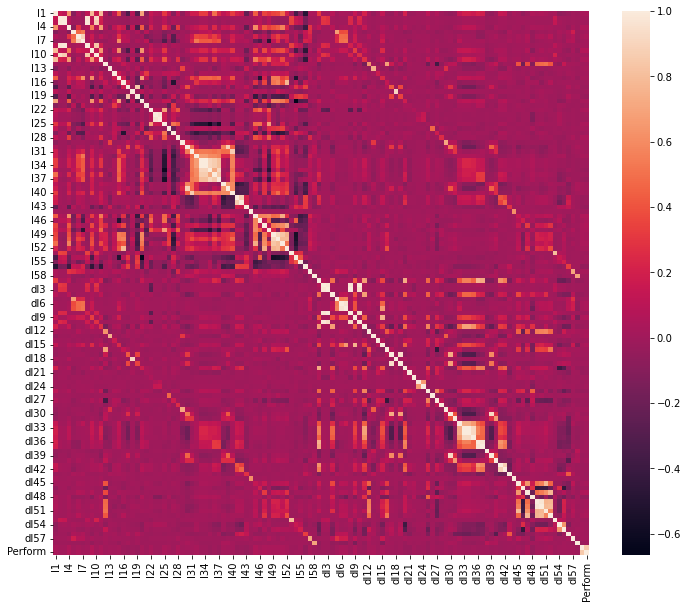

In [16]:
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,10)
sns.heatmap(training_data.iloc[:, 1:].corr())

In [11]:
len(training_data.columns)

119

In [ ]:
training_data.iloc[:, 1:30].corr()

<AxesSubplot:>

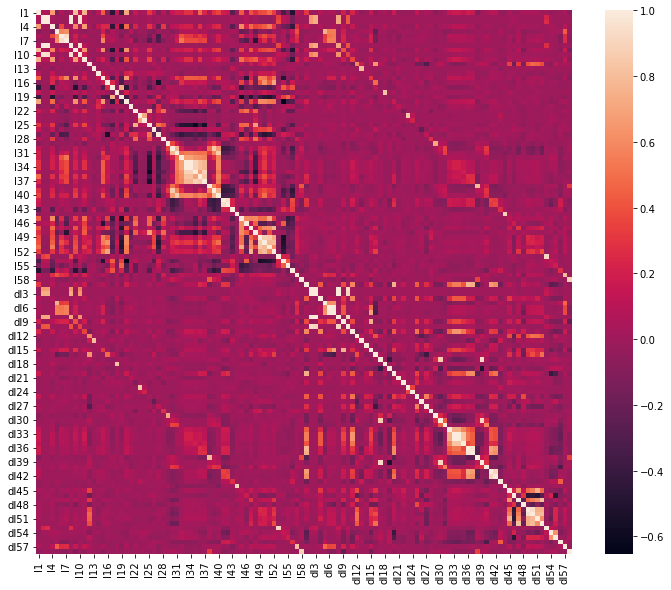

In [18]:
sns.heatmap(test_data_no_target.iloc[:, 1:].corr())

<AxesSubplot:>

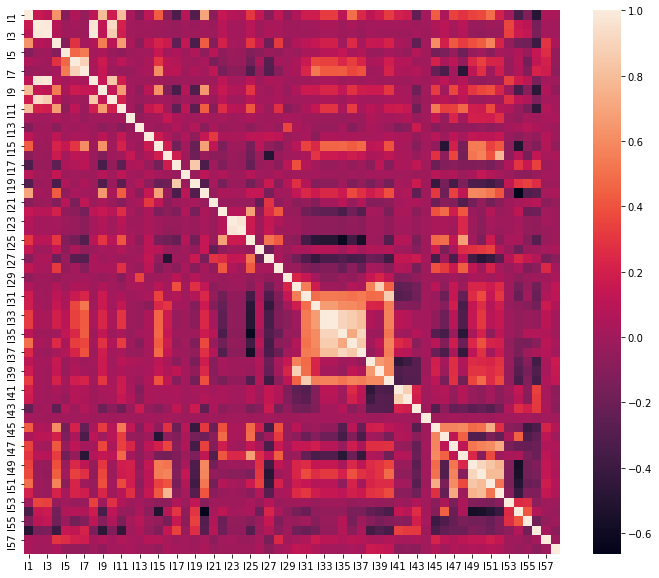

In [24]:
sns.heatmap(training_data.loc[:, "I1":"I58"].corr())

<AxesSubplot:>

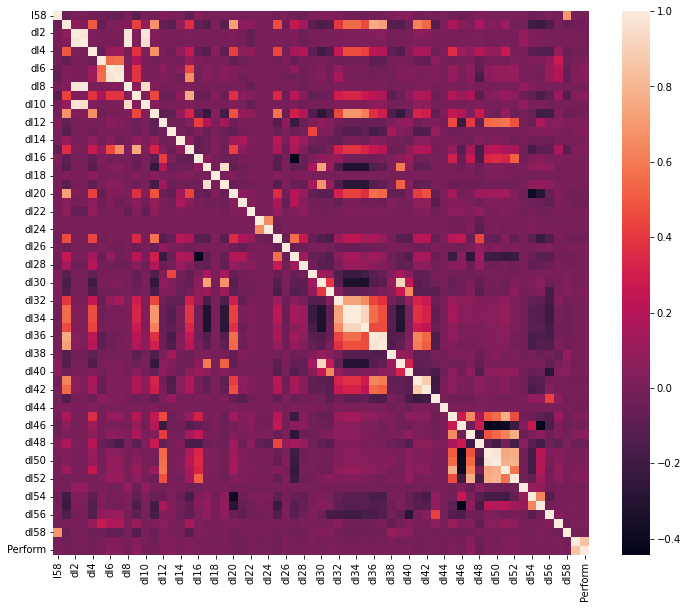

In [25]:
sns.heatmap(training_data.loc[:, "I58":].corr())